# Get relative velocity

d:\pySatellite\libs\Environments\CircularOrbit_2D.py:103: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, y, 'ro', color = 'gray')


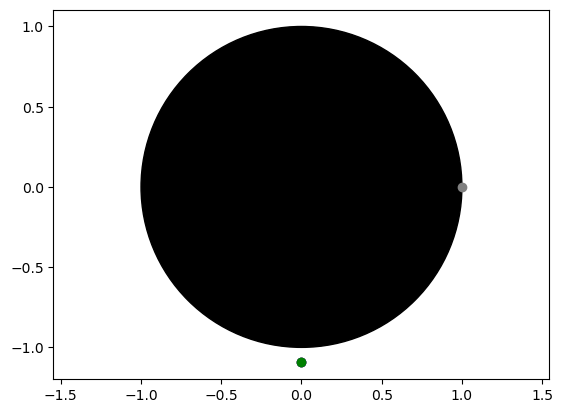

x Length :  0
y Length :  0
z Length :  0


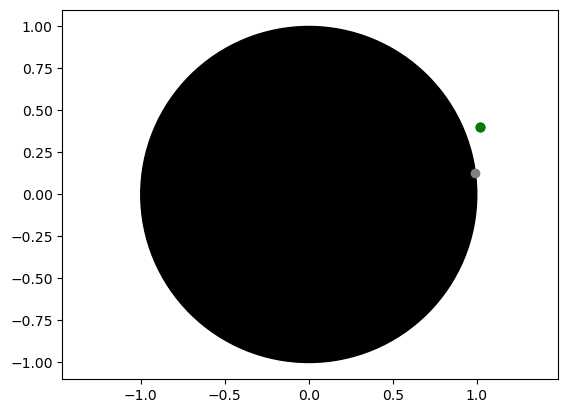

x Length :  66
y Length :  66
z Length :  66


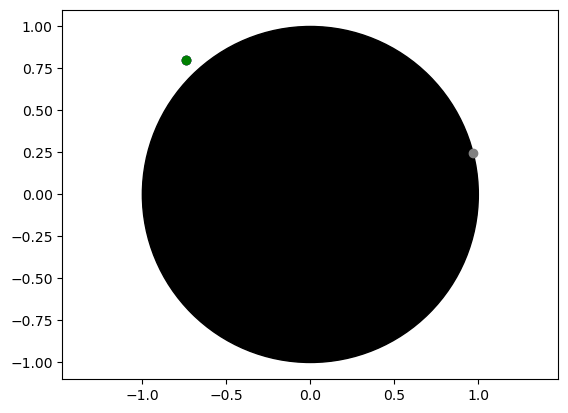

x Length :  82
y Length :  82
z Length :  82


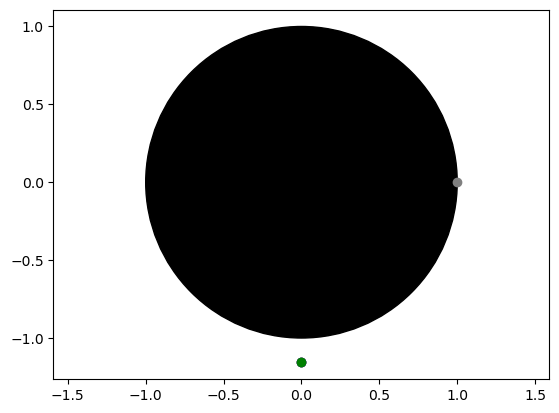

x Length :  0
y Length :  0
z Length :  0


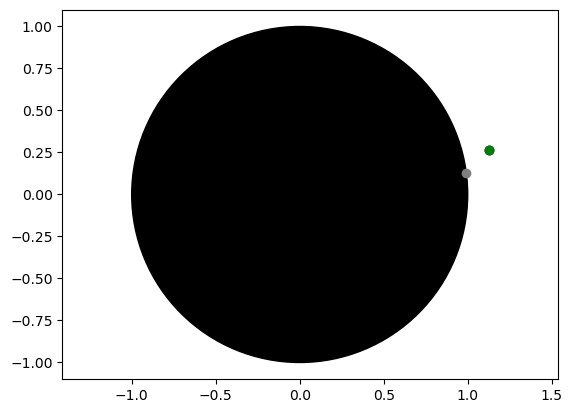

x Length :  68
y Length :  68
z Length :  68


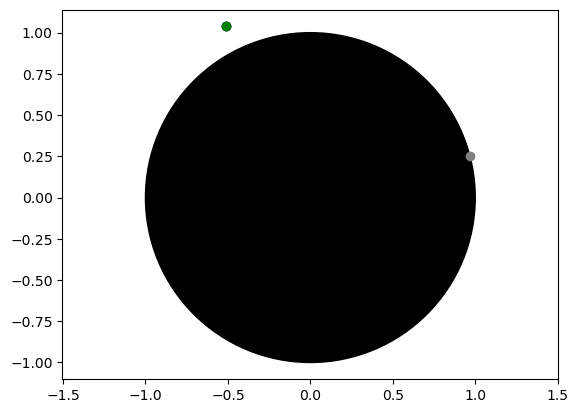

x Length :  113
y Length :  113
z Length :  113


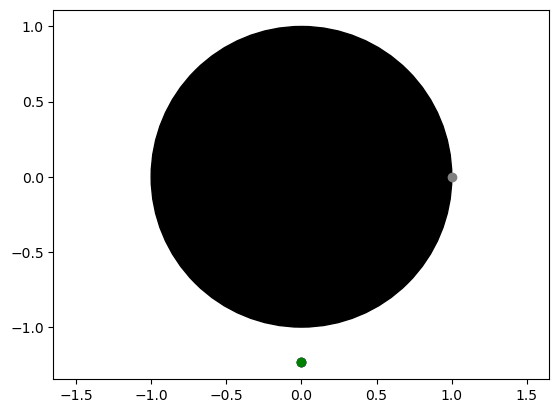

x Length :  0
y Length :  0
z Length :  0


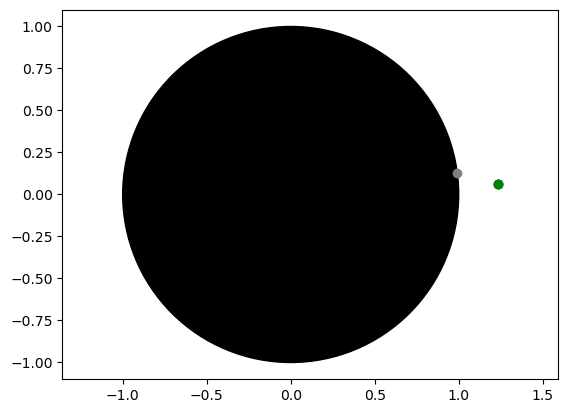

x Length :  67
y Length :  67
z Length :  67


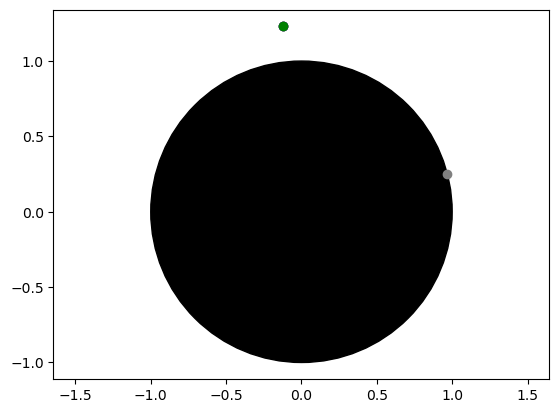

x Length :  151
y Length :  151
z Length :  151


In [1]:
from libs.Environments.Circular_GU_Sat import *
import numpy as np

kms = [600, 1000, 1500]
for km in kms:
    env = Circular_GU_Sat(
        satellite_num=1,
        orbit_alts=[km],
        ground_user_num=1
    )

    x_rel_vel = []
    y_rel_vel = []
    z_rel_vel = []

    x_doppler = []
    y_doppler = []
    z_doppler = []

    angles = []
    distances = []

    count = 0  

    while(True):
        if(count % 180 == 0):
            env.plot()
            print("x Length : ", len(x_rel_vel))
            print("y Length : ", len(y_rel_vel))
            print("z Length : ", len(z_rel_vel))

        env.rotate(10)
        v = env.calc_relative_velocities()

        if(v != None):
            vx, vy, vz = v
            x_rel_vel.append(vx)
            y_rel_vel.append(vy)
            z_rel_vel.append(vz)
            angles.append(env.get_angle())
            distances.append(env.get_distance())

        count += 1

        if(count == 1.5 * 60 * 6): # 3시간
            break

    np.save(str(km) + "_angle", angles)
    np.save(str(km) + "_distance", distances)
    np.save(str(km) + "_x_axis_velocity_change.npy", x_rel_vel)
    np.save(str(km) + "_y_axis_velocity_change.npy", y_rel_vel)
    np.save(str(km) + "_z_axis_velocity_change.npy", z_rel_vel)

# Calculate snr

In [7]:
from libs.Channels.SNR import *

kms = [600, 1000, 1500]

for alt in kms:
    ang = np.load(str(alt)+"_angle.npy")
    dist = np.load(str(alt) + "_distance.npy")

    x_basis_snr = []
    y_basis_snr = []
    z_basis_snr = []

    x_vel = np.load(str(alt)+"_x_axis_velocity_change.npy")

    for idx, vc in enumerate(x_vel):
        x_basis_snr.append(get_snr_fspl_doppler(distance=dist[idx], 
                                                velocity=vc,
                                                angle=ang[idx]))
    
    y_vel = np.load(str(alt)+"_y_axis_velocity_change.npy")
    for idx, vc in enumerate(y_vel):
        y_basis_snr.append(get_snr_fspl_doppler(distance=dist[idx], 
                                                velocity=vc,
                                                angle=ang[idx]))

    np.save(str(alt) + "_x_snr", x_basis_snr)
    np.save(str(alt) + "_y_snr", y_basis_snr)

for alt in kms:
    ang = np.load(str(alt)+"_angle.npy")
    dist = np.load(str(alt) + "_distance.npy")

    x_basis_snr = []
    y_basis_snr = []
    z_basis_snr = []

    x_vel = np.load(str(alt)+"_x_axis_velocity_change.npy")

    for idx, vc in enumerate(x_vel):
        x_basis_snr.append(get_snr_fspl(distance=dist[idx]))
    
    y_vel = np.load(str(alt)+"_y_axis_velocity_change.npy")
    for idx, vc in enumerate(y_vel):
        y_basis_snr.append(get_snr_fspl(distance=dist[idx]))

    np.save(str(alt) + "_x_snr_no_doppler", x_basis_snr)
    np.save(str(alt) + "_y_snr_no_doppler", y_basis_snr)

xmax :  118.51520741853639
xmin :  118.51520741815679
ymax :  118.51520741870391
ymin :  118.51520741799303


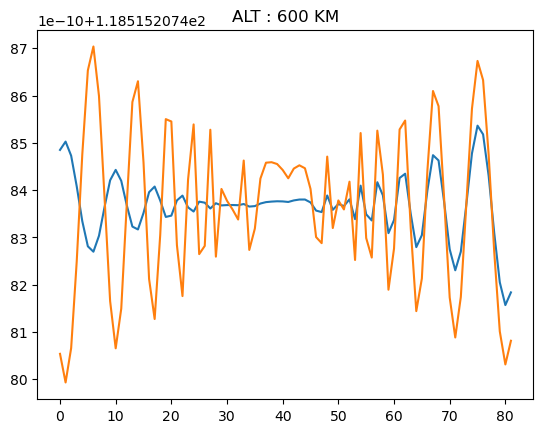

xmax :  118.51520741864584
xmin :  118.515207418045
ymax :  118.5152074187898
ymin :  118.51520741791218


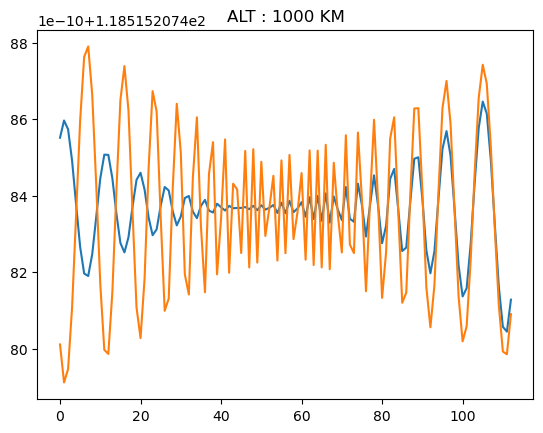

xmax :  118.5152074187606
xmin :  118.51520741791212
ymax :  118.51520741887373
ymin :  118.51520741784131


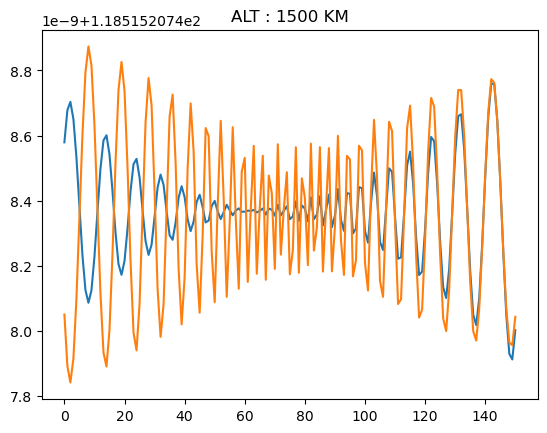

In [8]:
import matplotlib.pyplot as plt 

for alt in kms:
    plt.title("ALT : "+ str(alt) + " KM")
    x_snr = np.load(str(alt) + "_x_snr.npy")
    y_snr = np.load(str(alt) + "_y_snr.npy")
    print("xmax : ", np.max(x_snr))
    print("xmin : ", np.min(x_snr))

    print("ymax : ", np.max(y_snr))
    print("ymin : ", np.min(y_snr))

    plt.plot(x_snr)
    plt.plot(y_snr)
    plt.show()


xmax :  118.51488940309096
xmin :  118.508433183161
ymax :  118.51488940309096
ymin :  118.508433183161


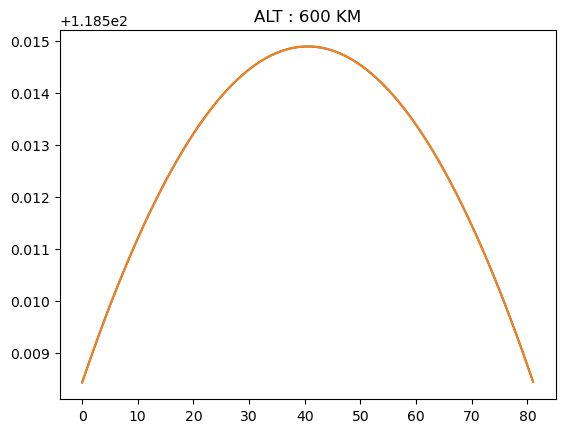

xmax :  118.51432659233603
xmin :  118.50333907608537
ymax :  118.51432659233603
ymin :  118.50333907608537


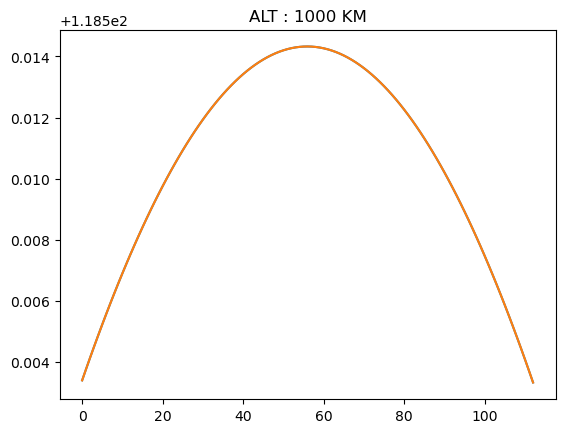

xmax :  118.51322568462662
xmin :  118.49658609038927
ymax :  118.51322568462662
ymin :  118.49658609038927


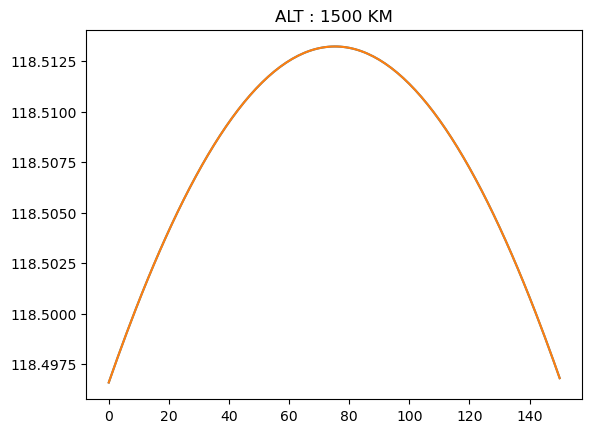

In [10]:
import matplotlib.pyplot as plt 

for alt in kms:
    plt.title("ALT : "+ str(alt) + " KM")
    x_snr = np.load(str(alt) + "_x_snr_no_doppler.npy")
    y_snr = np.load(str(alt) + "_y_snr_no_doppler.npy")
    print("xmax : ", np.max(x_snr))
    print("xmin : ", np.min(x_snr))

    print("ymax : ", np.max(y_snr))
    print("ymin : ", np.min(y_snr))

    plt.plot(x_snr)
    plt.plot(y_snr)
    plt.show()